Iteration 1000: Cost = 388.0977 ,Theta 0 = 0.04, Theta 1 = 1.24
Iteration 2000: Cost = 84.7311 ,Theta 0 = 0.06, Theta 1 = 1.78
Iteration 3000: Cost = 28.5211 ,Theta 0 = 0.06, Theta 1 = 2.01
Iteration 4000: Cost = 18.1050 ,Theta 0 = 0.07, Theta 1 = 2.11
Iteration 5000: Cost = 16.1738 ,Theta 0 = 0.07, Theta 1 = 2.15
Iteration 6000: Cost = 15.8147 ,Theta 0 = 0.07, Theta 1 = 2.17
Iteration 7000: Cost = 15.7470 ,Theta 0 = 0.07, Theta 1 = 2.18
Iteration 8000: Cost = 15.7331 ,Theta 0 = 0.07, Theta 1 = 2.18
Iteration 9000: Cost = 15.7293 ,Theta 0 = 0.08, Theta 1 = 2.18
Iteration 10000: Cost = 15.7273 ,Theta 0 = 0.08, Theta 1 = 2.18

Final Parameters:
theta0 = 0.08
theta1 = 2.18


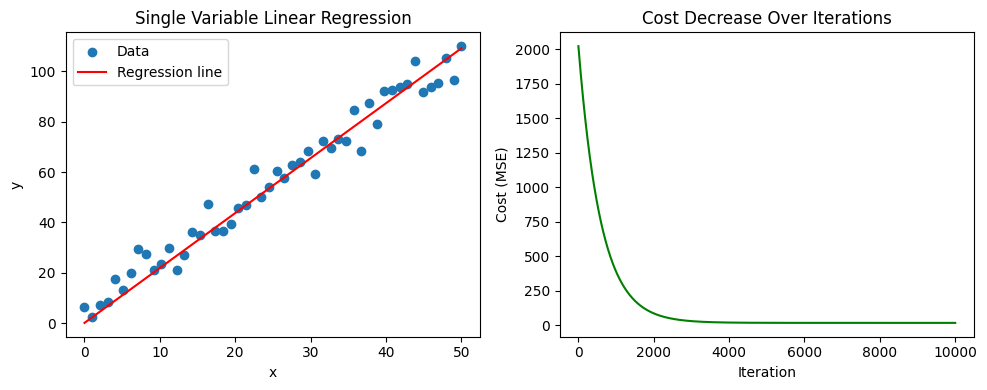

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(43)

x = np.linspace(0, 50, 50)

w = 2.0
b = 5.0

# Generate some random noise
noise = np.random.normal(loc=0, scale=5, size=x.shape)

y = b + (w*x) + noise

# Starting Gradient Descent Parameters
theta0 = 0.0
theta1 = 0.0

# Learning Rate
alpha = 0.000001

# Number of Gradient Descent Iterations
iteration = 10000

def compute_cost(x, y, t0, t1):
    '''
        Mean Squared Error (MSE) with 1/(2m) factor
        x,y: arrays of shape (m,)
        t0, t1: float parameters
    '''
    m = len(y)
    predictions = t0 + (t1*x)
    errors = predictions - y
    cost = (1/(2*m)) * np.sum(errors ** 2)
    return cost

def gradient_descent_step(x, y, t0, t1, alpha):
    '''
        Performs a single step of gradiant descent for single variable linear regression.
        Returns updated (t0, t1)
    '''
    
    m = len(y)
    predictions = t0 + (t1*x)
    errors = predictions - y

    # Calculating the partial derivatives
    dJ_dt0 = (1/m) * np.sum(errors)
    dJ_dt1 = (1/m) * np.sum(errors * x)

    # Update Rule
    t0 = t0 - alpha * (dJ_dt0)
    t1 = t1 - alpha * (dJ_dt1)

    # Return updated values
    return t0, t1

cost_history=[]

for i in range(iteration):
    # Perform a gradient descent step
    theta0, theta1 = gradient_descent_step(x, y, theta0, theta1, alpha)

    # Compute and store cost after current update
    current_cost = compute_cost(x, y, theta0, theta1)
    cost_history.append(current_cost)

    # Print (debug) cost every 100 iterations
    if (i+1) % 1000 == 0:
        print(f"Iteration {i+1:4d}: Cost = {current_cost:.4f} ,"
              f"Theta 0 = {theta0:.2f}, Theta 1 = {theta1:.2f}")
    
print("\nFinal Parameters:")
print(f"theta0 = {theta0:.2f}")
print(f"theta1 = {theta1:.2f}")

fig = plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.scatter(x, y, label="Data")
# Predicted values with learned parameters
y_pred = theta0 + theta1 * x
plt.plot(x, y_pred, color="red", label="Regression line")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Single Variable Linear Regression")
plt.legend()

# (B) Plot the Cost over Iterations
plt.subplot(1, 2, 2)
plt.plot(range(1, iteration+1), cost_history, color="green")
plt.xlabel("Iteration")
plt.ylabel("Cost (MSE)")
plt.title("Cost Decrease Over Iterations")

plt.tight_layout()
plt.show()

